In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('white')
import warnings
warnings.filterwarnings("ignore")
from itertools import cycle
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import KMeans

In [5]:
df =pd.read_csv('https://raw.githubusercontent.com/llimllib/bostonmarathon/master/results/2014/results.csv')

In [6]:
df.dtypes

10k           object
name          object
division       int64
25k           object
gender        object
age            int64
official     float64
bib           object
genderdiv      int64
ctz           object
35k           object
overall        int64
pace         float64
state         object
30k           object
5k            object
half          object
20k           object
country       object
city          object
40k           object
dtype: object

In [7]:
df.head()

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,...,overall,pace,state,30k,5k,half,20k,country,city,40k
0,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.25,W1,8,NaN,...,8,3.27,NaN,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43
1,32.58,"Jeptoo, Rita",1,82.43,F,33,138.95,F1,1,NaN,...,21,5.30,NaN,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10
2,16.62,"Van Dyk, Ernst F.",1,45.80,M,41,80.60,W2,1,NaN,...,1,3.08,NaN,56.45,7.75,38.03,36.10,RSA,Paarl,76.10
3,32.57,"Dibaba, Mare",3,82.43,F,24,140.58,F2,3,NaN,...,27,5.37,NaN,99.33,16.20,69.47,65.83,ETH,Shoa,132.95
4,17.12,"Hokinoue, Kota",2,46.37,M,40,81.23,W3,2,NaN,...,2,3.10,NaN,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72


In [8]:
df = df.sample(frac=0.1, random_state = 0)

In [9]:
df = df.drop(['bib','city','country','ctz','division','gender','genderdiv','overall','name','state'], 1)

In [10]:
df.head()

,10k,25k,age,official,35k,pace,30k,5k,half,20k,40k
252,42.42,105.28,33,177.10,146.70,6.77,126.02,21.38,89.28,84.78,167.98
18599,50.53,128.45,46,222.25,183.45,8.48,155.68,25.42,107.72,102.10,210.42
13797,47.98,122.43,57,235.00,182.92,8.97,149.88,23.63,102.77,97.53,218.92
6472,43.00,112.60,25,200.45,164.07,7.65,138.08,21.23,93.92,88.80,189.53
17205,56.37,139.18,36,239.85,198.03,9.15,169.98,28.53,118.00,112.07,227.67


In [11]:
columns =df[['10k','25k','age','official', '35k','pace', '30k','5k','half','20k','40k']]

for column in columns: 
    df[column] = pd.to_numeric(df[column], errors='coerce')

In [12]:
df = df.dropna()

In [13]:
df.describe()

,10k,25k,age,official,35k,pace,30k,5k,half,20k,40k
count,3166.000000,3166.000000,3166.000000,3166.000000,3166.000000,3166.000000,3166.000000,3166.000000,3166.000000,3166.000000,3166.000000
mean,51.750755,134.062183,42.184144,242.901238,196.854289,9.272669,164.571924,25.739991,111.581791,105.669460,229.093973
std,8.761738,25.980339,11.468917,51.494791,41.382279,1.964202,33.510329,4.222130,20.626223,19.466659,48.685083
min,17.650000,47.670000,18.000000,84.650000,70.230000,3.230000,58.600000,8.380000,39.720000,37.650000,79.830000
25%,45.322500,115.185000,33.000000,205.777500,166.885000,7.850000,140.302500,22.650000,96.492500,91.497500,193.822500
50%,50.640000,129.925000,42.000000,233.500000,189.240000,8.920000,158.905000,25.230000,108.375000,102.675000,219.775000
75%,57.050000,148.830000,50.000000,275.465000,221.810000,10.520000,184.015000,28.445000,123.230000,116.727500,259.080000
max,94.450000,281.850000,81.000000,534.220000,449.330000,20.380000,376.380000,45.680000,222.070000,211.750000,508.350000


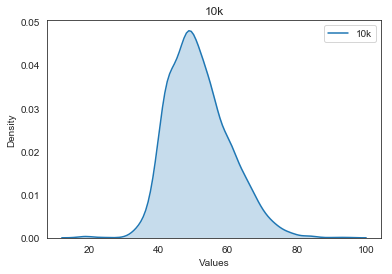

count    3166.000000
mean       51.750755
std         8.761738
min        17.650000
25%        45.322500
50%        50.640000
75%        57.050000
max        94.450000
Name: 10k, dtype: float64


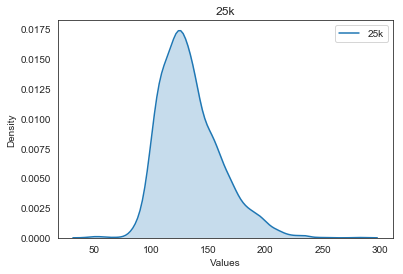

count    3166.000000
mean      134.062183
std        25.980339
min        47.670000
25%       115.185000
50%       129.925000
75%       148.830000
max       281.850000
Name: 25k, dtype: float64


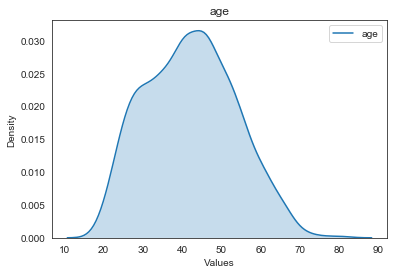

count    3166.000000
mean       42.184144
std        11.468917
min        18.000000
25%        33.000000
50%        42.000000
75%        50.000000
max        81.000000
Name: age, dtype: float64


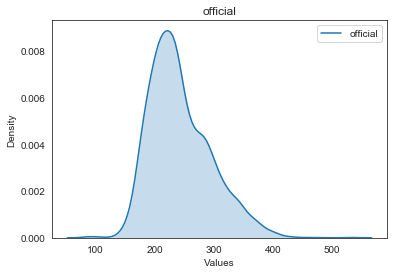

count    3166.000000
mean      242.901238
std        51.494791
min        84.650000
25%       205.777500
50%       233.500000
75%       275.465000
max       534.220000
Name: official, dtype: float64


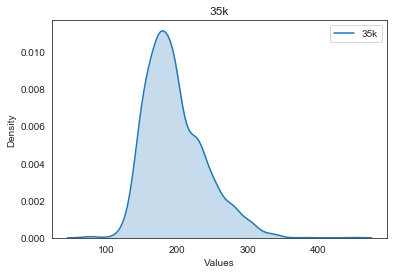

count    3166.000000
mean      196.854289
std        41.382279
min        70.230000
25%       166.885000
50%       189.240000
75%       221.810000
max       449.330000
Name: 35k, dtype: float64


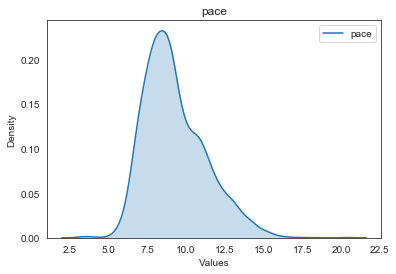

count    3166.000000
mean        9.272669
std         1.964202
min         3.230000
25%         7.850000
50%         8.920000
75%        10.520000
max        20.380000
Name: pace, dtype: float64


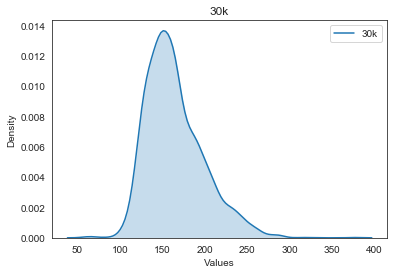

count    3166.000000
mean      164.571924
std        33.510329
min        58.600000
25%       140.302500
50%       158.905000
75%       184.015000
max       376.380000
Name: 30k, dtype: float64


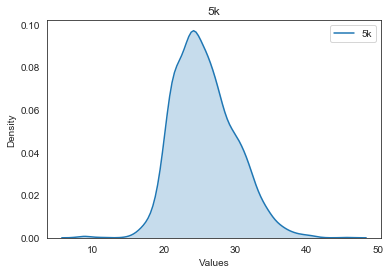

count    3166.000000
mean       25.739991
std         4.222130
min         8.380000
25%        22.650000
50%        25.230000
75%        28.445000
max        45.680000
Name: 5k, dtype: float64


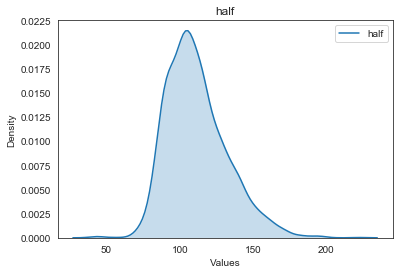

count    3166.000000
mean      111.581791
std        20.626223
min        39.720000
25%        96.492500
50%       108.375000
75%       123.230000
max       222.070000
Name: half, dtype: float64


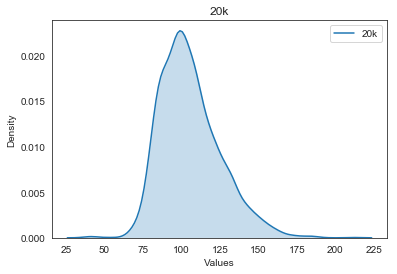

count    3166.000000
mean      105.669460
std        19.466659
min        37.650000
25%        91.497500
50%       102.675000
75%       116.727500
max       211.750000
Name: 20k, dtype: float64


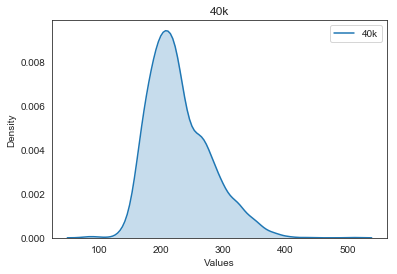

count    3166.000000
mean      229.093973
std        48.685083
min        79.830000
25%       193.822500
50%       219.775000
75%       259.080000
max       508.350000
Name: 40k, dtype: float64


In [14]:
column_plots = df.columns

for column in column_plots:
    sns.kdeplot(df[column], shade = True)
    plt.title(column)
    plt.xlabel('Values')
    plt.ylabel('Density')
    plt.show()

    print(df[column].describe())

In [17]:
X_norm= normalize(df)
X_norm_df = pd.DataFrame(normalize(df), columns = df.columns)

In [16]:
X_pca = PCA(n_components=2).fit_transform(X_norm)
X_pca_df = pd.DataFrame(PCA(n_components=2).fit_transform(X_norm))

## K-Means Clustering

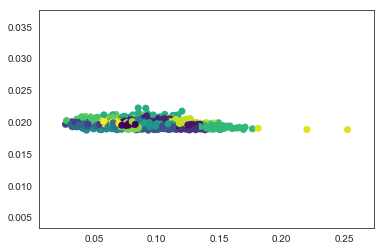

In [20]:
km = KMeans(n_clusters=22, random_state=0).fit(X_norm_df)

km_labels = km.labels_
plt.scatter(X_norm_df['age'], X_norm_df['pace'], c=km_labels, cmap='viridis')
plt.show()

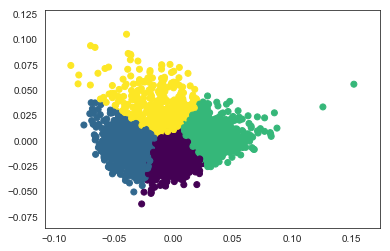

In [21]:
km2 = KMeans(n_clusters=4, random_state=0).fit(X_pca_df)

km2_labels = km2.labels_
plt.scatter(X_pca_df.iloc[:,0], X_pca_df.iloc[:,1], c=km2_labels, cmap='viridis')
plt.show()

## Mean Shift Clustering

Number of Estimated Clusters: 4


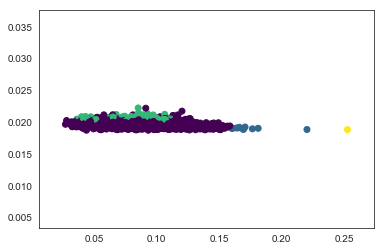

In [19]:
bandwidth = estimate_bandwidth(X_norm)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True).fit(X_norm_df)

ms_labels = ms.labels_
cluster_centers = ms.cluster_centers_
n_clusters_ = len(np.unique(ms_labels))

print("Number of Estimated Clusters: {}".format(n_clusters_))
plt.scatter(X_norm_df['age'], X_norm_df['pace'], c=ms_labels, cmap='viridis')
plt.show()

Number of Estimated Clusters: 3


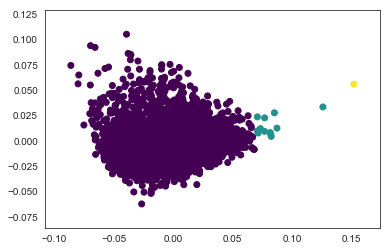

In [16]:
bandwidth2 = estimate_bandwidth(X_pca)
ms2 = MeanShift(bandwidth=bandwidth2, bin_seeding=True).fit(X_pca_df)

ms2_labels = ms2.labels_
cluster_centers2 = ms2.cluster_centers_
n_clusters_2 = len(np.unique(ms2_labels))

print("Number of Estimated Clusters: {}".format(n_clusters_2))
plt.scatter(X_pca_df.iloc[:,0], X_pca_df.iloc[:,1], c=ms2_labels, cmap='viridis')
plt.show()

## Spectral Clustering

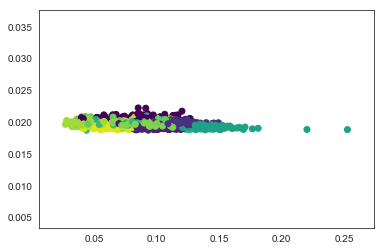

In [23]:
sc = SpectralClustering(n_clusters=22)
sc.fit(X_norm_df)

sc_labels = sc.labels_
plt.scatter(X_norm_df['age'], X_norm_df['pace'], c=sc_labels, cmap='viridis')
plt.show()

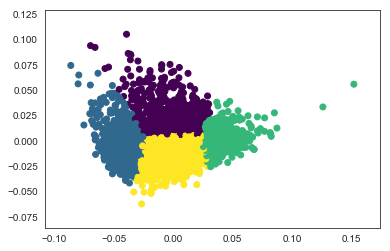

In [24]:
sc2 = SpectralClustering(n_clusters=4)
sc2.fit(X_pca_df)

sc2_labels = sc2.labels_
plt.scatter(X_pca_df.iloc[:,0], X_pca_df.iloc[:,1], c=sc2_labels, cmap='viridis')
plt.show()